In [154]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
import numpy as np

In [155]:
fred = Fred(api_key = "f10c53de058cc60e1ced033ea987cb5b")

# Extract data from FRED API

In [156]:
# # List of economic indicators to analyze
indicators = {
    'GDP': 'GDP',
    'Unemployment Rate': 'UNRATE',
    'Inflation Rate': 'CPIAUCSL',
    'Interest Rate': 'FEDFUNDS',
    'Consumer Sentiment': 'UMCSENT',
    'Industrial Production': 'INDPRO',
    'Retail Sales': 'RSAFS'
}

In [157]:
# Function to fetch data from FRED
def get_fred_data(series_id, start_date = '2010-01-01', end_date = "2023-12-31"):
    data = fred.get_series(series_id, observation_start = start_date,observation_end = end_date )
    return pd.DataFrame(data , columns=[series_id])

In [158]:
# Fetch data for all indicators
data = {}
for name,series_id in indicators.items():
    data[name] = get_fred_data(series_id)

In [159]:
# Combine all datasets into a single DataFrame
df = pd.concat(data.values(),axis  = 1)
df.columns = indicators.keys()

In [160]:
df.head()

,GDP,Unemployment Rate,Inflation Rate,Interest Rate,Consumer Sentiment,Industrial Production,Retail Sales
2010-01-01,14764.610,9.8,217.488,0.11,74.4,89.1897,345889.0
2010-02-01,NaN,9.8,217.281,0.13,73.6,89.5046,346724.0
2010-03-01,NaN,9.9,217.353,0.16,73.6,90.1356,354119.0
2010-04-01,14980.193,9.9,217.403,0.20,72.2,90.4607,357354.0
2010-05-01,NaN,9.6,217.290,0.20,73.6,91.7014,354068.0


In [161]:
# Handle missing values
df = df.fillna(method = 'ffill')   # Forward fill missing values


In [162]:
# Resample data to monthly frequency (some indicators might be quarterly or annual)
df = df.resample('M').last()  #For each month, this will pick the last data point available in that month.

In [163]:
df.head()

,GDP,Unemployment Rate,Inflation Rate,Interest Rate,Consumer Sentiment,Industrial Production,Retail Sales
2010-01-31,14764.610,9.8,217.488,0.11,74.4,89.1897,345889.0
2010-02-28,14764.610,9.8,217.281,0.13,73.6,89.5046,346724.0
2010-03-31,14764.610,9.9,217.353,0.16,73.6,90.1356,354119.0
2010-04-30,14980.193,9.9,217.403,0.20,72.2,90.4607,357354.0
2010-05-31,14980.193,9.6,217.290,0.20,73.6,91.7014,354068.0


# Line plot of all indicators over time

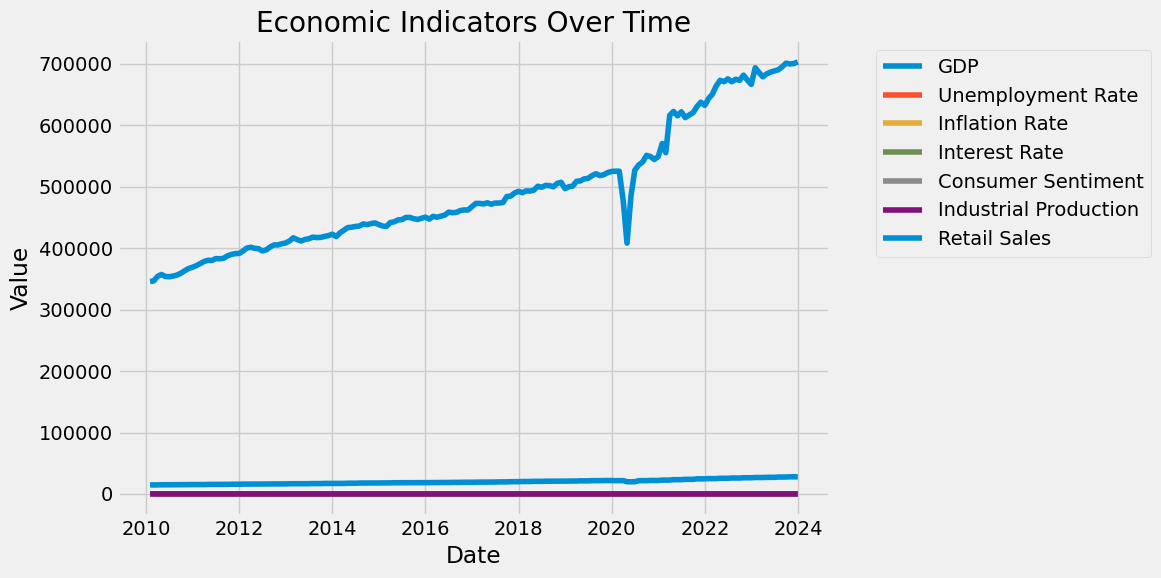

In [164]:
plt.figure(figsize=(12,6))
for column in df.columns:
    plt.plot(df.index,df[column],label = column)
plt.title('Economic Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left') # Place the legend outside the plot on the upper left
plt.tight_layout()# Adjust the padding between and around subplots for a cleaner layout
plt.show()
    

# Correlation heatmap

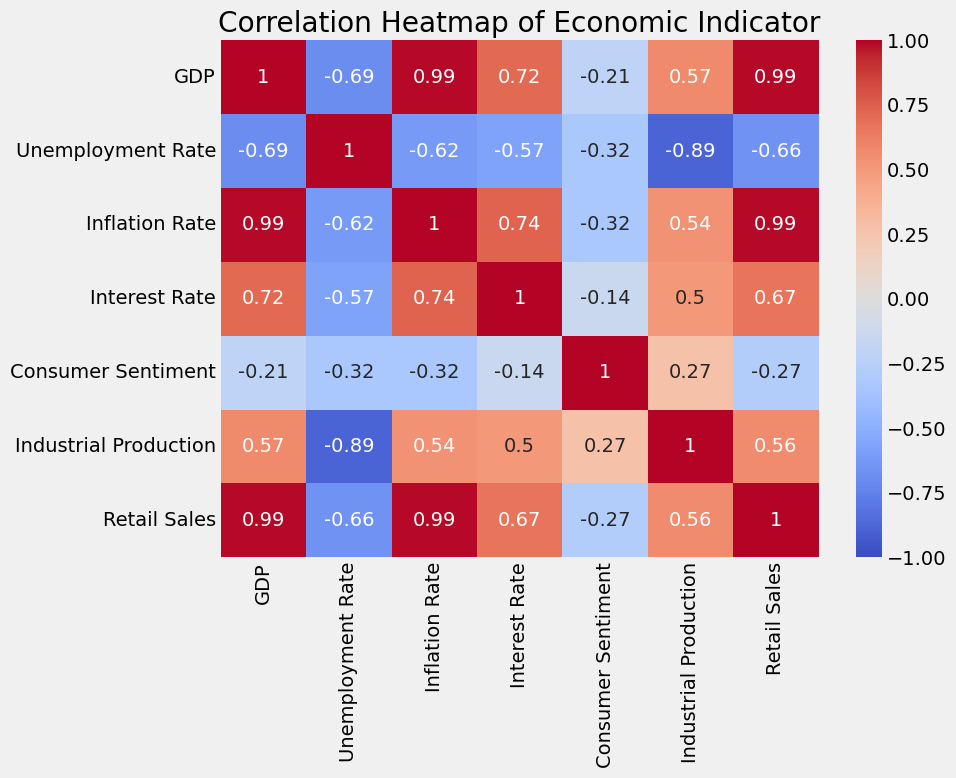

In [165]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Economic Indicator')
plt.tight_layout()
plt.show()

# GDP growth rate

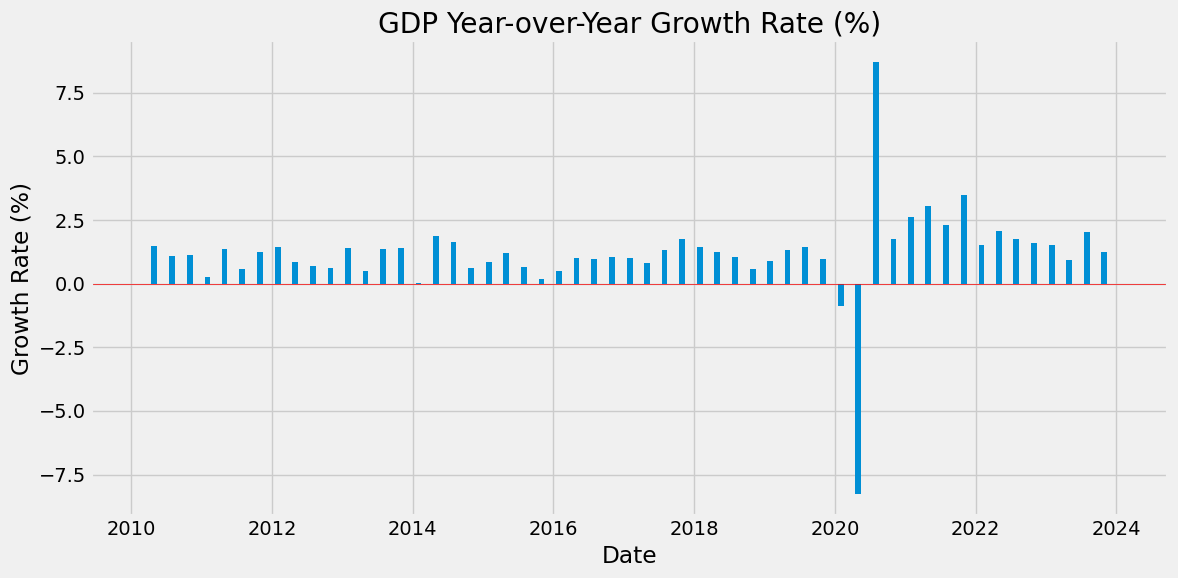

In [166]:
# .pct_change(): Calculates the percentage change between the current and previous GDP value.
gdp_growth = df['GDP'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.bar(gdp_growth.index, gdp_growth.values, width=30)  # width=30 for better visibility of bars
plt.title('GDP Year-over-Year Growth Rate (%)')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()

# Unemployment vs Inflation scatter plot

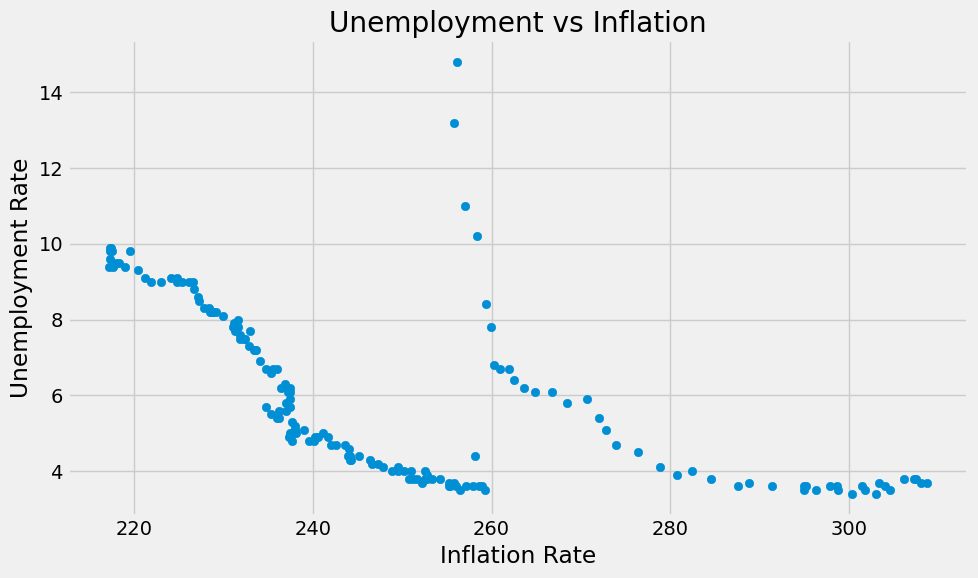

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Inflation Rate'], df['Unemployment Rate'])
plt.title('Unemployment vs Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Unemployment Rate')
plt.tight_layout()
plt.show()

# Normalize Data

In [168]:
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()



# Box plot of all indicators

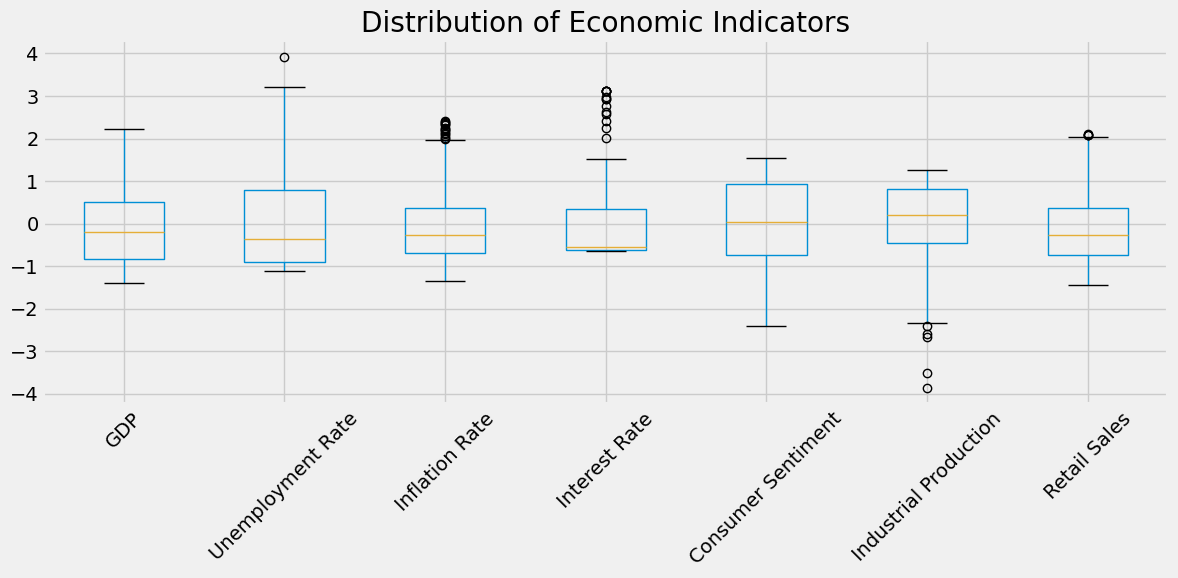

In [169]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Distribution of Economic Indicators')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

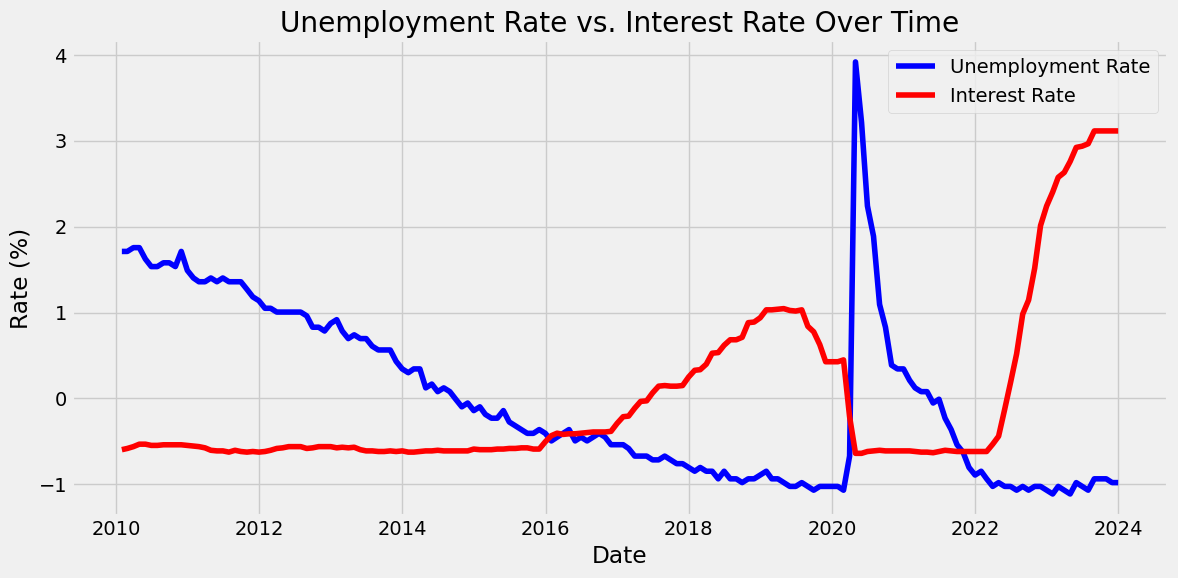

In [170]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Unemployment Rate'], label='Unemployment Rate', color='blue')
plt.plot(df.index, df['Interest Rate'], label='Interest Rate', color='red')
plt.title('Unemployment Rate vs. Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [174]:
ip_growth = df['Industrial Production'].pct_change() * 100

# Calculate yearly average growth
yearly_avg_growth = ip_growth.groupby(ip_growth.index.year).mean()



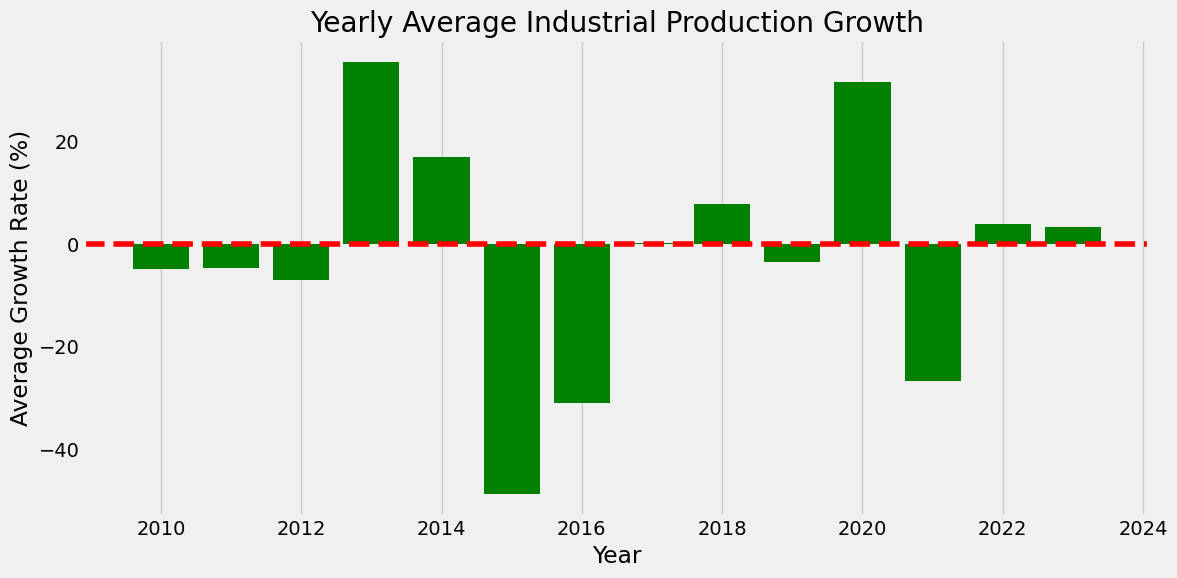

In [176]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_avg_growth.index, yearly_avg_growth.values, color='green')
plt.title('Yearly Average Industrial Production Growth')
plt.xlabel('Year')
plt.ylabel('Average Growth Rate (%)')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y')
plt.tight_layout()
plt.show()